In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, root_mean_squared_log_error
from sklearn.model_selection import RandomizedSearchCV

In [2]:
# Fix the file path
df = pd.read_csv(r"/content/drive/MyDrive/Buldozer-price/TrainAndValid.csv", low_memory=False)

In [3]:
# Display dataframe shape
print(df.shape)
print(df.isna().sum())
print(df.info())
print(df.head())
print(df.columns)
print(df.saledate.dtype)

(412698, 53)
SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_E

In [4]:
list(df.columns)

['SalesID',
 'SalePrice',
 'MachineID',
 'ModelID',
 'datasource',
 'auctioneerID',
 'YearMade',
 'MachineHoursCurrentMeter',
 'UsageBand',
 'saledate',
 'fiModelDesc',
 'fiBaseModel',
 'fiSecondaryDesc',
 'fiModelSeries',
 'fiModelDescriptor',
 'ProductSize',
 'fiProductClassDesc',
 'state',
 'ProductGroup',
 'ProductGroupDesc',
 'Drive_System',
 'Enclosure',
 'Forks',
 'Pad_Type',
 'Ride_Control',
 'Stick',
 'Transmission',
 'Turbocharged',
 'Blade_Extension',
 'Blade_Width',
 'Enclosure_Type',
 'Engine_Horsepower',
 'Hydraulics',
 'Pushblock',
 'Ripper',
 'Scarifier',
 'Tip_Control',
 'Tire_Size',
 'Coupler',
 'Coupler_System',
 'Grouser_Tracks',
 'Hydraulics_Flow',
 'Track_Type',
 'Undercarriage_Pad_Width',
 'Stick_Length',
 'Thumb',
 'Pattern_Changer',
 'Grouser_Type',
 'Backhoe_Mounting',
 'Blade_Type',
 'Travel_Controls',
 'Differential_Type',
 'Steering_Controls']

In [5]:
# Calculate the total number of missing values in each column
missing_data_count = df.isna().sum()

# Display the results
print(missing_data_count)

#  Alternatively, to get a single total for the entire dataframe:
total_missing = df.isna().sum().sum()
print(f"Total missing values in the DataFrame: {total_missing}")


SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

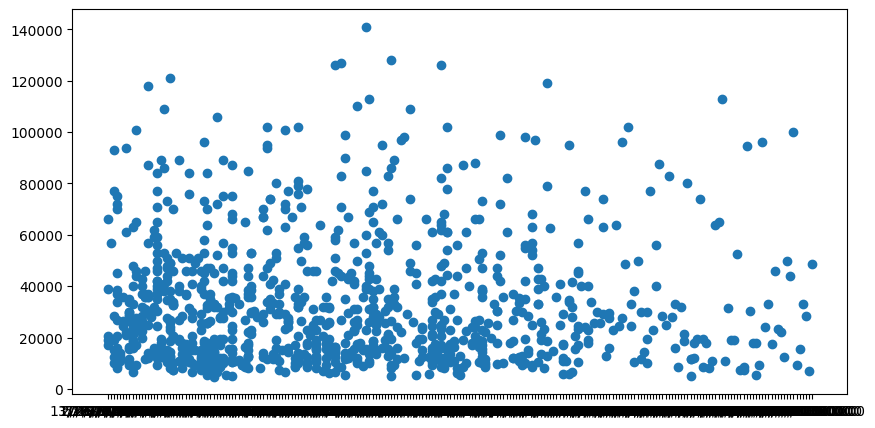

In [6]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 5))  # ✅ Now plt is recognized
ax.scatter(df["saledate"][:1000], df["SalePrice"][:1000])  # Example: Scatter plot of first column

# Show the plot
plt.show()
# Show the plot
plt.show()

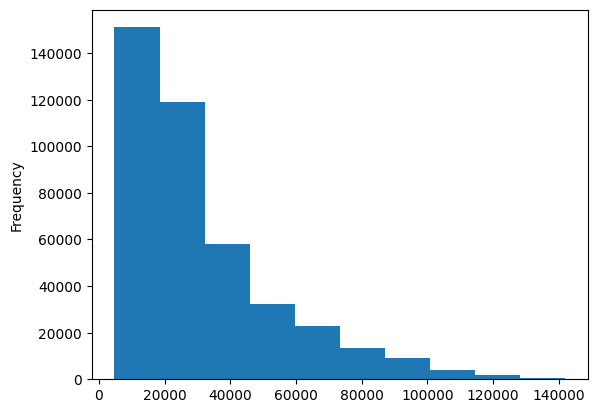

In [7]:
df.SalePrice.plot.hist()
plt.show()

In [8]:
# Select a numerical column (e.g., 'SalePrice' or another feature)
column_name = "SalePrice"  # Change this to your relevant column

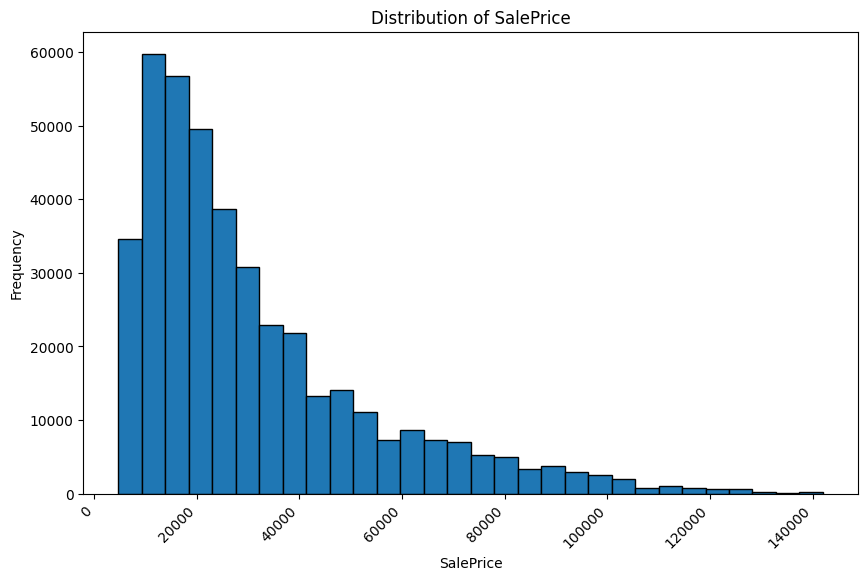

In [9]:

# Plot histogram
fig, ax = plt.subplots(figsize=(10, 6))  # Increase figure size
ax.hist(df[column_name], bins=30, edgecolor="black")  # Adjust bins

# Improve x-axis labels
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability

# Add titles and labels
ax.set_xlabel(column_name)
ax.set_ylabel("Frequency")
ax.set_title(f"Distribution of {column_name}")

plt.show()



In [10]:
#Parse date

df = pd.read_csv(r"/content/drive/MyDrive/Buldozer-price/TrainAndValid.csv",
                 low_memory=False,
                 parse_dates=["saledate"])
print(df["saledate"])

0        2006-11-16
1        2004-03-26
2        2004-02-26
3        2011-05-19
4        2009-07-23
            ...    
412693   2012-03-07
412694   2012-01-28
412695   2012-01-28
412696   2012-03-07
412697   2012-01-28
Name: saledate, Length: 412698, dtype: datetime64[ns]


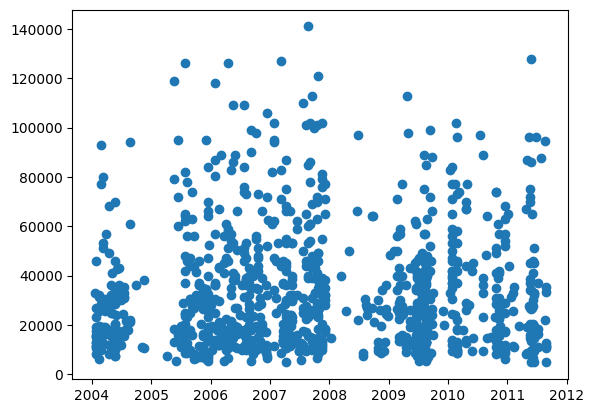

In [11]:
# Create a figure and axis
fig, ax = plt.subplots()  # Now plt is recognized
ax.scatter(df["saledate"][:1000], df["SalePrice"][:1000])  # Example: Scatter plot of first column

# Show the plot
plt.show()


In [12]:
# Count the number of rows for each unique date
date_counts = df["saledate"].value_counts().sort_index()
print(date_counts.head(30))  # Show the top 30 date counts


saledate
1989-01-17      1
1989-01-31     97
1989-02-01    492
1989-02-14     18
1989-02-15     31
1989-02-25     22
1989-02-28     83
1989-03-09     68
1989-03-10      1
1989-03-14    114
1989-03-15     37
1989-03-16    218
1989-03-18     32
1989-03-21     62
1989-03-22     30
1989-03-23     26
1989-03-28     59
1989-03-29     14
1989-03-30     33
1989-04-01     10
1989-04-03      9
1989-04-04     33
1989-04-05     27
1989-04-06    101
1989-04-07     30
1989-04-08     37
1989-04-11     11
1989-04-13     16
1989-04-14      8
1989-04-15     83
Name: count, dtype: int64


In [13]:
# SOrt dateframe by saledate
df.sort_values(by=["saledate"], inplace=True, ascending=True)
print(df.saledate.head(20))
print(df.saledate.tail(20)) # Use tail(20) to get the last 20 rows

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
54653    1989-01-31
81383    1989-01-31
204924   1989-01-31
135376   1989-01-31
113390   1989-01-31
113394   1989-01-31
116419   1989-01-31
32138    1989-01-31
127610   1989-01-31
76171    1989-01-31
127000   1989-01-31
128130   1989-01-31
127626   1989-01-31
55455    1989-01-31
55454    1989-01-31
Name: saledate, dtype: datetime64[ns]
406079   2012-04-28
409783   2012-04-28
411522   2012-04-28
412218   2012-04-28
411527   2012-04-28
406092   2012-04-28
409780   2012-04-28
406167   2012-04-28
411334   2012-04-28
412164   2012-04-28
409202   2012-04-28
408976   2012-04-28
411695   2012-04-28
411319   2012-04-28
408889   2012-04-28
410879   2012-04-28
412476   2012-04-28
411927   2012-04-28
407124   2012-04-28
409203   2012-04-28
Name: saledate, dtype: datetime64[ns]


In [14]:
print(df["saledate"].dt.year.unique())
#print(df["saledate"].dt.day.unique())


[1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002
 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012]


In [15]:
# Extract the year from the 'saledate' column and count occurrences
yearly_counts = df["saledate"].dt.year.value_counts().sort_index()

# Display the counts for each year
print(yearly_counts)
print(yearly_counts.sum())  # or print(yearly_counts.size) to get the number of years

saledate
1989     4806
1990     4529
1991     5109
1992     5519
1993     6303
1994     7929
1995     8530
1996     8829
1997     9785
1998    13046
1999    12793
2000    17415
2001    17594
2002    17246
2003    15254
2004    19879
2005    20463
2006    21685
2007    32208
2008    39767
2009    43849
2010    33390
2011    35197
2012    11573
Name: count, dtype: int64
412698


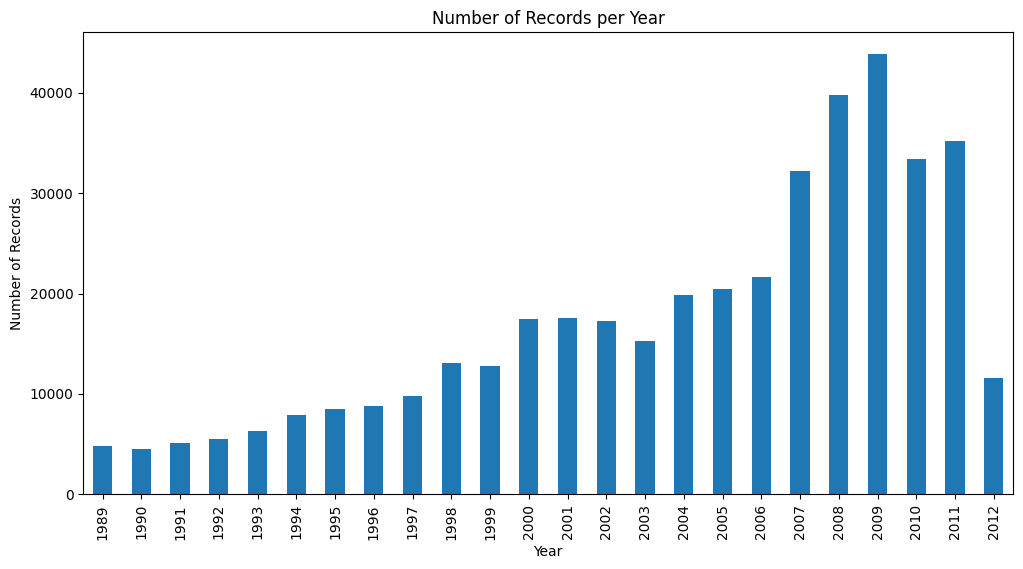

In [16]:
import matplotlib.pyplot as plt

yearly_counts.plot(kind="bar", figsize=(12, 6))
plt.title("Number of Records per Year")
plt.xlabel("Year")
plt.ylabel("Number of Records")
plt.show()


In [17]:
df["saledate"].duplicated()

,saledate
205615,False
274835,False
141296,True
212552,True
62755,True
...,...
410879,True
412476,True
411927,True
407124,True


In [18]:
#Make a copy of original df
df_tmp = df.copy()
print(df_tmp.head(20))

#Add Datatime parameters for saledate column
print(df_tmp[:1].saledate.dt.year)
print(df_tmp[:1].saledate.dt.day)


        SalesID  SalePrice  MachineID  ModelID  datasource  auctioneerID  \
205615  1646770     9500.0    1126363     8434         132          18.0   
274835  1821514    14000.0    1194089    10150         132          99.0   
141296  1505138    50000.0    1473654     4139         132          99.0   
212552  1671174    16000.0    1327630     8591         132          99.0   
62755   1329056    22000.0    1336053     4089         132          99.0   
54653   1301884    23500.0    1182999     4123         132          99.0   
81383   1379228    31000.0    1082797     7620         132          99.0   
204924  1645390    11750.0    1527216     8202         132          99.0   
135376  1493279    63000.0    1363756     2759         132          99.0   
113390  1449549    13000.0    1289412     3356         132          99.0   
113394  1449555    10500.0    1102310     3356         132          99.0   
116419  1453775    20000.0    1514650     7008         132          99.0   
32138   1264

In [19]:
# Add datetime parameters for saledate

df_tmp["saleYear"] = df_tmp.saledate.dt.year
df_tmp["saleMonth"] = df_tmp.saledate.dt.month
df_tmp["saleDay"] = df_tmp.saledate.dt.day
df_tmp["saleDayofweek"] = df_tmp.saledate.dt.dayofweek
df_tmp["saleDayofyear"] = df_tmp.saledate.dt.dayofyear

# Drop original saledate column
df_tmp.drop("saledate", axis=1, inplace=True)

In [20]:
 # Print column names and example content of columns which contain strings
for label, content in df_tmp.items():

    if pd.api.types.is_string_dtype(content):
              # Check datatype of target column
              column_datatype = df_tmp[label].dtype.name

              # Get random sample from column values
              example_value = content.sample(1).values

              # Infer random sample datatype
              example_value_dtype = pd.api.types.infer_dtype(example_value)
              print(
                  f"Column name: {label} | Column dtype: {column_datatype} | Example value: {example_value} | Example value dtype: {example_value_dtype}")


print(df_tmp.state.value_counts())

Column name: fiModelDesc | Column dtype: object | Example value: ['IT28F'] | Example value dtype: string
Column name: fiBaseModel | Column dtype: object | Example value: ['HL740'] | Example value dtype: string
Column name: fiProductClassDesc | Column dtype: object | Example value: ['Wheel Loader - 60.0 to 80.0 Horsepower'] | Example value dtype: string
Column name: state | Column dtype: object | Example value: ['Minnesota'] | Example value dtype: string
Column name: ProductGroup | Column dtype: object | Example value: ['TEX'] | Example value dtype: string
Column name: ProductGroupDesc | Column dtype: object | Example value: ['Track Excavators'] | Example value dtype: string
state
Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298

In [21]:
# View newly created columns
df_tmp[["SalePrice", "saleYear", "saleMonth", "saleDay", "saleDayofweek", "saleDayofyear"]].head()

,SalePrice,saleYear,saleMonth,saleDay,saleDayofweek,saleDayofyear
205615,9500.0,1989,1,17,1,17
274835,14000.0,1989,1,31,1,31
141296,50000.0,1989,1,31,1,31
212552,16000.0,1989,1,31,1,31
62755,22000.0,1989,1,31,1,31


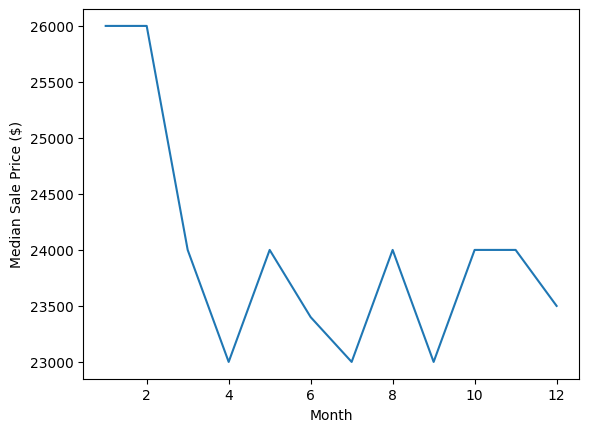

In [22]:
# Group DataFrame by saleMonth and then find the median SalePrice
df_tmp.groupby(["saleMonth"])["SalePrice"].median().plot()
plt.xlabel("Month")
plt.ylabel("Median Sale Price ($)");

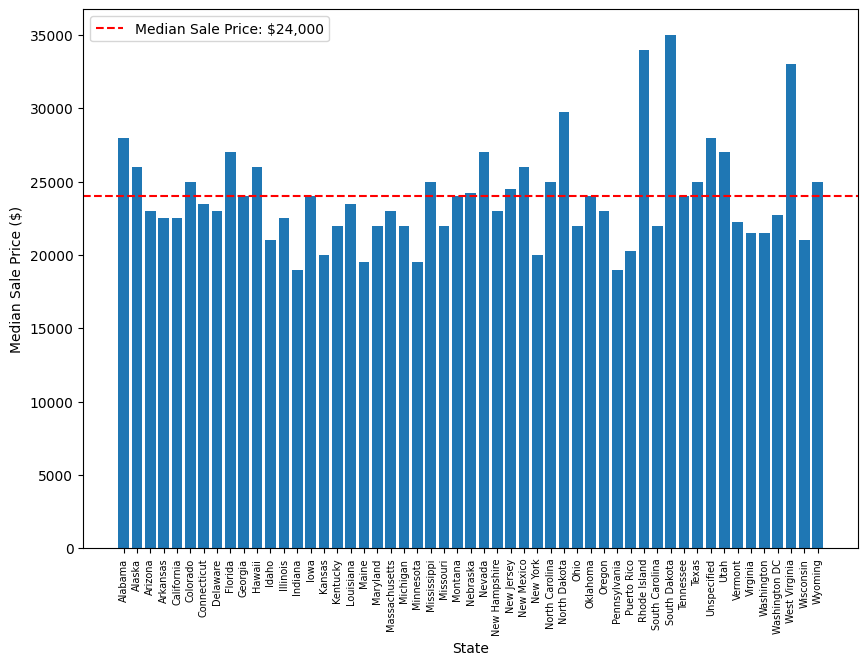

In [23]:
# Group DataFrame by saleMonth and then find the median SalePrice per state as well as across the whole dataset
median_prices_by_state = df_tmp.groupby(["state"])["SalePrice"].median() # this will return a pandas Series rather than a DataFrame
median_sale_price = df_tmp["SalePrice"].median()

# Create a plot comparing median sale price per state to median sale price overall
plt.figure(figsize=(10, 7))
plt.bar(x=median_prices_by_state.index, # Because we're working with a Series, we can use the index (state names) as the x values
        height=median_prices_by_state.values)
plt.xlabel("State")
plt.ylabel("Median Sale Price ($)")
plt.xticks(rotation=90, fontsize=7);
plt.axhline(y=median_sale_price,
            color="red",
            linestyle="--",
            label=f"Median Sale Price: ${median_sale_price:,.0f}")
plt.legend();

In [24]:
# Start a count of how many object type columns there are
number_of_object_type_columns = 0

for label, content in df_tmp.items():
    # Check to see if column is of object type (this will include the string columns)
    if pd.api.types.is_object_dtype(content):
        # Check datatype of target column
        column_datatype = df_tmp[label].dtype.name

        # Get random sample from column values
        example_value = content.sample(1).values

        # Infer random sample datatype
        example_value_dtype = pd.api.types.infer_dtype(example_value)
        print(f"Column name: {label} | Column dtype: {column_datatype} | Example value: {example_value} | Example value dtype: {example_value_dtype}")

        number_of_object_type_columns += 1

print(f"\n[INFO] Total number of object type columns: {number_of_object_type_columns}")

Column name: UsageBand | Column dtype: object | Example value: [nan] | Example value dtype: empty
Column name: fiModelDesc | Column dtype: object | Example value: ['D5G'] | Example value dtype: string
Column name: fiBaseModel | Column dtype: object | Example value: ['EC290'] | Example value dtype: string
Column name: fiSecondaryDesc | Column dtype: object | Example value: ['G'] | Example value dtype: string
Column name: fiModelSeries | Column dtype: object | Example value: ['III'] | Example value dtype: string
Column name: fiModelDescriptor | Column dtype: object | Example value: [nan] | Example value dtype: empty
Column name: ProductSize | Column dtype: object | Example value: ['Large'] | Example value dtype: string
Column name: fiProductClassDesc | Column dtype: object | Example value: ['Backhoe Loader - Unidentified'] | Example value dtype: string
Column name: state | Column dtype: object | Example value: ['Montana'] | Example value dtype: string
Column name: ProductGroup | Column d

In [25]:
# This will turn all of the object columns into category values
for label, content in df_tmp.items():
    if pd.api.types.is_object_dtype(content):
        df_tmp[label] = df_tmp[label].astype("category")

In [26]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor         748

In [27]:
# Check the datatype of a single column
df_tmp.state.dtype

CategoricalDtype(categories=['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
                  'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia',
                  'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas',
                  'Kentucky', 'Louisiana', 'Maine', 'Maryland',
                  'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
                  'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
                  'New Jersey', 'New Mexico', 'New York', 'North Carolina',
                  'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
                  'Puerto Rico', 'Rhode Island', 'South Carolina',
                  'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah',
                  'Vermont', 'Virginia', 'Washington', 'Washington DC',
                  'West Virginia', 'Wisconsin', 'Wyoming'],
, ordered=False, categories_dtype=object)

In [28]:
# Inspect the category codes
df_tmp.state.cat.codes


,0
205615,43
274835,8
141296,8
212552,8
62755,8
...,...
410879,4
412476,4
411927,4
407124,4


In [29]:
# Get example string using category number
target_state_cat_number = 43
target_state_cat_value = df_tmp.state.cat.categories[target_state_cat_number]
print(f"[INFO] Target state category number {target_state_cat_number} maps to: {target_state_cat_value}")

[INFO] Target state category number 43 maps to: Texas


In [30]:
# Save preprocessed data to file
df_tmp.to_csv("/content/drive/MyDrive/Buldozer-price/TrainAndValid_object_values_as_categories.csv",
              index=False)

In [31]:
# Import preprocessed data to file
df_tmp = pd.read_csv("/content/drive/MyDrive/Buldozer-price/TrainAndValid_object_values_as_categories.csv",
                     low_memory=False)

df_tmp.head()


,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayofweek,saleDayofyear
0,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,TD20,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,17,1,17
1,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,A66,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
2,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,D7G,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,31,1,31
3,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,A62,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
4,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,D3B,...,None or Unspecified,PAT,Lever,NaN,NaN,1989,1,31,1,31


In [32]:
for label, content in df_tmp.items():
    if pd.api.types.is_object_dtype(content):
        # Turn object columns into category datatype
        df_tmp[label] = df_tmp[label].astype("category")

In [33]:
# To save to parquet format requires pyarrow or fastparquet (or both)
# Can install via `pip install pyarrow fastparquet`
df_tmp.to_parquet(path="/content/drive/MyDrive/Buldozer-price/TrainAndValid_object_values_as_categories.parquet",
                  engine="auto") # "auto" will automatically use pyarrow or fastparquet, defaulting to pyarrow first

In [34]:
# Read in df_tmp from parquet format
df_tmp = pd.read_parquet(path="/content/drive/MyDrive/Buldozer-price/TrainAndValid_object_values_as_categories.parquet",
                         engine="auto")

# Using parquet format, datatypes are preserved
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor         748

In [35]:
# Check missing values
df_tmp.isna().sum().sort_values(ascending=False)[:20]

,0
Blade_Width,386715
Enclosure_Type,386715
Engine_Horsepower,386715
Tip_Control,386715
Pushblock,386715
Blade_Extension,386715
Scarifier,386704
Grouser_Tracks,367823
Hydraulics_Flow,367823
Coupler_System,367724


In [36]:
# Find numeric columns
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        # Check datatype of target column
        column_datatype = df_tmp[label].dtype.name

        # Get random sample from column values
        example_value = content.sample(1).values

        # Infer random sample datatype
        example_value_dtype = pd.api.types.infer_dtype(example_value)
        print(f"Column name: {label} | Column dtype: {column_datatype} | Example value: {example_value} | Example value dtype: {example_value_dtype}")

Column name: SalesID | Column dtype: int64 | Example value: [1388059] | Example value dtype: integer
Column name: SalePrice | Column dtype: float64 | Example value: [8000.] | Example value dtype: floating
Column name: MachineID | Column dtype: int64 | Example value: [1309599] | Example value dtype: integer
Column name: ModelID | Column dtype: int64 | Example value: [85] | Example value dtype: integer
Column name: datasource | Column dtype: int64 | Example value: [149] | Example value dtype: integer
Column name: auctioneerID | Column dtype: float64 | Example value: [1.] | Example value dtype: floating
Column name: YearMade | Column dtype: int64 | Example value: [2000] | Example value dtype: integer
Column name: MachineHoursCurrentMeter | Column dtype: float64 | Example value: [0.] | Example value dtype: floating
Column name: saleYear | Column dtype: int64 | Example value: [2006] | Example value dtype: integer
Column name: saleMonth | Column dtype: int64 | Example value: [5] | Example va

In [37]:
# Check for which numeric columns have null values
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(f"Column name: {label} | Has missing values: {True}")
        else:
            print(f"Column name: {label} | Has missing values: {False}")

Column name: SalesID | Has missing values: False
Column name: SalePrice | Has missing values: False
Column name: MachineID | Has missing values: False
Column name: ModelID | Has missing values: False
Column name: datasource | Has missing values: False
Column name: auctioneerID | Has missing values: True
Column name: YearMade | Has missing values: False
Column name: MachineHoursCurrentMeter | Has missing values: True
Column name: saleYear | Has missing values: False
Column name: saleMonth | Has missing values: False
Column name: saleDay | Has missing values: False
Column name: saleDayofweek | Has missing values: False
Column name: saleDayofyear | Has missing values: False


In [38]:
# Fill missing numeric values with the median of the target column
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():

            # Add a binary column which tells if the data was missing our not
            df_tmp[label+"_is_missing"] = pd.isnull(content).astype(int) # this will add a 0 or 1 value to rows with missing values (e.g. 0 = not missing, 1 = missing)

            # Fill missing numeric values with median since it's more robust than the mean
            df_tmp[label] = content.fillna(content.median())

In [39]:
# Show rows where MachineHoursCurrentMeter_is_missing == 1
df_tmp[df_tmp["MachineHoursCurrentMeter_is_missing"] == 1].sample(5)

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayofweek,saleDayofyear,auctioneerID_is_missing,MachineHoursCurrentMeter_is_missing
77315,1275290,5500.0,1413324,3112,132,1.0,1000,0.0,NaN,1845C,...,NaN,NaN,NaN,1999,3,24,2,83,0,1
97846,1682752,23000.0,1410864,1989,132,1.0,1000,0.0,NaN,EX200LC,...,NaN,NaN,NaN,2000,9,14,3,258,0,1
95842,1762514,14000.0,1456637,208,132,1.0,1991,0.0,NaN,D37P-2,...,None or Unspecified,NaN,NaN,2000,6,27,1,179,0,1
59095,1491895,47000.0,1270510,4107,132,6.0,1988,0.0,NaN,D4H,...,None or Unspecified,NaN,NaN,1997,10,7,1,280,0,1
5388,1344580,54000.0,1110679,3819,132,1.0,1983,0.0,NaN,950B,...,NaN,Standard,Conventional,1990,2,22,3,53,0,1


In [40]:
# Check for which numeric columns have null values
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(f"Column name: {label} | Has missing values: {True}")
        else:
            print(f"Column name: {label} | Has missing values: {False}")

Column name: SalesID | Has missing values: False
Column name: SalePrice | Has missing values: False
Column name: MachineID | Has missing values: False
Column name: ModelID | Has missing values: False
Column name: datasource | Has missing values: False
Column name: auctioneerID | Has missing values: False
Column name: YearMade | Has missing values: False
Column name: MachineHoursCurrentMeter | Has missing values: False
Column name: saleYear | Has missing values: False
Column name: saleMonth | Has missing values: False
Column name: saleDay | Has missing values: False
Column name: saleDayofweek | Has missing values: False
Column name: saleDayofyear | Has missing values: False
Column name: auctioneerID_is_missing | Has missing values: False
Column name: MachineHoursCurrentMeter_is_missing | Has missing values: False


In [41]:
# Check to see how many examples in the auctioneerID were missing
df_tmp.auctioneerID_is_missing.value_counts()

,count
auctioneerID_is_missing,
0,392562
1,20136


In [42]:
# Check columns which aren't numeric
print(f"[INFO] Columns which are not numeric:")
for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(f"Column name: {label} | Column dtype: {df_tmp[label].dtype.name}")

[INFO] Columns which are not numeric:
Column name: UsageBand | Column dtype: category
Column name: fiModelDesc | Column dtype: category
Column name: fiBaseModel | Column dtype: category
Column name: fiSecondaryDesc | Column dtype: category
Column name: fiModelSeries | Column dtype: category
Column name: fiModelDescriptor | Column dtype: category
Column name: ProductSize | Column dtype: category
Column name: fiProductClassDesc | Column dtype: category
Column name: state | Column dtype: category
Column name: ProductGroup | Column dtype: category
Column name: ProductGroupDesc | Column dtype: category
Column name: Drive_System | Column dtype: category
Column name: Enclosure | Column dtype: category
Column name: Forks | Column dtype: category
Column name: Pad_Type | Column dtype: category
Column name: Ride_Control | Column dtype: category
Column name: Stick | Column dtype: category
Column name: Transmission | Column dtype: category
Column name: Turbocharged | Column dtype: category
Column n

In [43]:
# 1. Create a dictionary to store column to category values (e.g. we turn our category types into numbers but we keep a record so we can go back)
column_to_category_dict = {}

# 2. Turn categorical variables into numbers
for label, content in df_tmp.items():

    # 3. Check columns which *aren't* numeric
    if not pd.api.types.is_numeric_dtype(content):

        # 4. Add binary column to inidicate whether sample had missing value
        df_tmp[label+"_is_missing"] = pd.isnull(content).astype(int)

        # 5. Ensure content is categorical and get its category codes
        content_categories = pd.Categorical(content)
        content_category_codes = content_categories.codes + 1 # prevents -1 (the default for NaN values) from being used for missing values (we'll treat missing values as 0)

        # 6. Add column key to dictionary with code: category mapping per column
        column_to_category_dict[label] = dict(zip(content_category_codes, content_categories))

        # 7. Set the column to the numerical values (the category code value)
        df_tmp[label] = content_category_codes

In [44]:
df_tmp.sample(5)

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
247915,2239587,32000.0,890167,1545,136,20.0,2000,0.0,0,2164,...,1,1,1,1,1,0,0,0,1,1
216239,1276002,6500.0,1159027,6633,132,3.0,2000,0.0,0,185,...,1,1,1,1,1,1,1,1,1,1
211126,1690256,15000.0,1287686,1989,132,2.0,1990,0.0,0,2641,...,0,0,0,0,0,1,1,1,1,1
87376,1722998,33000.0,1307362,16247,132,99.0,1995,0.0,0,4349,...,0,0,0,0,0,1,1,1,1,1
107524,1655008,8750.0,1300606,8554,132,7.0,1989,0.0,0,2824,...,1,1,1,1,1,0,0,0,1,1


In [45]:
# Check the UsageBand (measure of bulldozer usage)
for key, value in sorted(column_to_category_dict["UsageBand"].items()): # note: calling sorted() on dictionary.items() sorts the dictionary by keys
    print(f"{key} -> {value}")

0 -> nan
1 -> High
2 -> Low
3 -> Medium


In [46]:
# Check the first 10 state column values
for key, value in sorted(column_to_category_dict["state"].items())[:10]:
    print(f"{key} -> {value}")

1 -> Alabama
2 -> Alaska
3 -> Arizona
4 -> Arkansas
5 -> California
6 -> Colorado
7 -> Connecticut
8 -> Delaware
9 -> Florida
10 -> Georgia


In [47]:
# Check total number of missing values
total_missing_values = df_tmp.isna().sum().sum()

if total_missing_values == 0:
    print(f"[INFO] Total missing values: {total_missing_values} - Woohoo! Let's build a model!")
else:
    print(f"[INFO] Uh ohh... total missing values: {total_missing_values} - Perhaps we might have to retrace our steps to fill the values?")

[INFO] Total missing values: 0 - Woohoo! Let's build a model!


In [48]:
# Save preprocessed data with object values as categories as well as missing values filled
df_tmp.to_parquet(path="/content/drive/MyDrive/Buldozer-price/TrainAndValid_object_values_as_categories_and_missing_values_filled.parquet",
                  engine="auto")

In [49]:
# Check total number of missing values
total_missing_values = df_tmp.isna().sum().sum()

if total_missing_values == 0:
    print(f"[INFO] Total missing values: {total_missing_values} - Woohoo! Let's build a model!")
else:
    print(f"[INFO] Uh ohh... total missing values: {total_missing_values} - Perhaps we might have to retrace our steps to fill the values?")

[INFO] Total missing values: 0 - Woohoo! Let's build a model!


In [50]:
%%time

# Sample 1000 samples with random state 42 for reproducibility
df_tmp_sample_1k = df_tmp.sample(n=1000, random_state=42)

# Instantiate a model
model = RandomForestRegressor(n_jobs=-1) # use -1 to utilise all available processors

# Create features and labels
X_sample_1k = df_tmp_sample_1k.drop("SalePrice", axis=1) # use all columns except SalePrice as X values
y_sample_1k = df_tmp_sample_1k["SalePrice"] # use SalePrice as y values (target variable)

# Fit the model to the sample data
model.fit(X=X_sample_1k,
          y=y_sample_1k)

CPU times: user 2.24 s, sys: 28 ms, total: 2.27 s
Wall time: 1.27 s


RandomForestRegressor(n_jobs=-1)

In [51]:
# Evaluate the model
model_sample_1k_score = model.score(X=X_sample_1k,
                                    y=y_sample_1k)

print(f"[INFO] Model score on {len(df_tmp_sample_1k)} samples: {model_sample_1k_score}")

[INFO] Model score on 1000 samples: 0.9577558024563446


In [52]:
%%time

# Instantiate model
model = RandomForestRegressor(n_jobs=-1) # note: this could take quite a while

# Create features and labels with entire dataset
X_all = df_tmp.drop("SalePrice", axis=1)
y_all = df_tmp["SalePrice"]

# Fit the model
model.fit(X=X_all,
          y=y_all)

CPU times: user 19min 43s, sys: 4.85 s, total: 19min 48s
Wall time: 11min 42s


RandomForestRegressor(n_jobs=-1)

In [53]:
# Evaluate the model
model_sample_all_score = model.score(X=X_all,
                                     y=y_all)

print(f"[INFO] Model score on {len(df_tmp)} samples: {model_sample_all_score}")

[INFO] Model score on 412698 samples: 0.9875430925180588


In [54]:
df_tmp.saleYear.value_counts()

,count
saleYear,
2009,43849
2008,39767
2011,35197
2010,33390
2007,32208
2006,21685
2005,20463
2004,19879
2001,17594


In [55]:
# Split data into training and validation
df_val = df_tmp[df_tmp.saleYear == 2012]
df_train = df_tmp[df_tmp.saleYear != 2012]

len(df_val), len(df_train)

(11573, 401125)

In [56]:
# Split data into X & y
X_train, y_train = df_train.drop("SalePrice", axis=1), df_train.SalePrice
X_valid, y_valid = df_val.drop("SalePrice", axis=1), df_val.SalePrice

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((401125, 102), (401125,), (11573, 102), (11573,))

In [57]:
# Create evaluation function (the competition uses Root Mean Square Log Error)
from sklearn.metrics import mean_squared_log_error, mean_absolute_error

# TK - can now use RMSLE from sckit-learn, see: https://scikit-learn.org/1.5/modules/generated/sklearn.metrics.root_mean_squared_log_error.html#sklearn.metrics.root_mean_squared_log_error
def rmsle(y_test, y_preds):
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

# Create function to evaluate our model
def show_scores(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_valid)
    scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
              "Valid MAE": mean_absolute_error(y_valid, val_preds),
              "Training RMSLE": rmsle(y_train, train_preds),
              "Valid RMSLE": rmsle(y_valid, val_preds),
              "Training R^2": model.score(X_train, y_train),
              "Valid R^2": model.score(X_valid, y_valid)}
    return scores

In [58]:
show_scores(model)

{'Training MAE': 1578.3000567503893,
 'Valid MAE': 1859.5769558455024,
 'Training RMSLE': 0.08414189382844743,
 'Valid RMSLE': 0.08731253392377182,
 'Training R^2': 0.9875541851389782,
 'Valid R^2': 0.9869471664810882}

In [59]:
%%time
from sklearn.model_selection import RandomizedSearchCV

# Different RandomForestClassifier hyperparameters
rf_grid = {"n_estimators": np.arange(10, 100, 10),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),
           "max_features": [0.5, 1.0, "sqrt"], # Note: "max_features='auto'" is equivalent to "max_features=1.0", as of Scikit-Learn version 1.1
           "max_samples": [10000]}

rs_model = RandomizedSearchCV(RandomForestRegressor(),
                              param_distributions=rf_grid,
                              n_iter=20,
                              cv=5,
                              verbose=True)

rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
CPU times: user 6min 9s, sys: 9.14 s, total: 6min 18s
Wall time: 6min 19s


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1.0, 'sqrt'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [60]:
# Find the best parameters from the RandomizedSearch
rs_model.best_params_

{'n_estimators': 40,
 'min_samples_split': 10,
 'min_samples_leaf': 7,
 'max_samples': 10000,
 'max_features': 1.0,
 'max_depth': None}

In [61]:
# Evaluate the RandomizedSearch model
show_scores(rs_model)

{'Training MAE': 5970.778292151696,
 'Valid MAE': 7519.295182982395,
 'Training RMSLE': 0.27225791567211793,
 'Valid RMSLE': 0.30231347505253525,
 'Training R^2': 0.8378040671054839,
 'Valid R^2': 0.808864440694733}

In [62]:
%%time
# Most ideal hyperparameters
ideal_model = RandomForestRegressor(n_estimators=90,
                                    min_samples_leaf=1,
                                    min_samples_split=14,
                                    max_features=0.5,
                                    n_jobs=-1,
                                    max_samples=None)
ideal_model.fit(X_train, y_train)

CPU times: user 6min 51s, sys: 1.02 s, total: 6min 52s
Wall time: 4min 3s


RandomForestRegressor(max_features=0.5, min_samples_split=14, n_estimators=90,
                      n_jobs=-1)

In [63]:
show_scores(ideal_model)

{'Training MAE': 2922.7278279843167,
 'Valid MAE': 5925.781243392874,
 'Training RMSLE': 0.14317006402951607,
 'Valid RMSLE': 0.24440736224342632,
 'Training R^2': 0.9598498196573275,
 'Valid R^2': 0.882802411666996}

In [64]:
%%time
# Faster model
fast_model = RandomForestRegressor(n_estimators=40,
                                   min_samples_leaf=3,
                                   max_features=0.5,
                                   n_jobs=-1)
fast_model.fit(X_train, y_train)

CPU times: user 3min 13s, sys: 734 ms, total: 3min 14s
Wall time: 1min 51s


RandomForestRegressor(max_features=0.5, min_samples_leaf=3, n_estimators=40,
                      n_jobs=-1)

In [65]:
show_scores(fast_model)

{'Training MAE': 2535.953465100168,
 'Valid MAE': 5947.689077977185,
 'Training RMSLE': 0.12925206455502855,
 'Valid RMSLE': 0.24491170046142186,
 'Training R^2': 0.9673411315079097,
 'Valid R^2': 0.8810641692627356}

In [67]:
df_test = pd.read_csv("/content/drive/MyDrive/Buldozer-price/Test.csv",
                      parse_dates=["saledate"])
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


In [68]:
def preprocess_data(df):
    # Add datetime parameters for saledate
    df["saleYear"] = df.saledate.dt.year
    df["saleMonth"] = df.saledate.dt.month
    df["saleDay"] = df.saledate.dt.day
    df["saleDayofweek"] = df.saledate.dt.dayofweek
    df["saleDayofyear"] = df.saledate.dt.dayofyear

    # Drop original saledate
    df.drop("saledate", axis=1, inplace=True)

    # Fill numeric rows with the median
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                df[label+"_is_missing"] = pd.isnull(content)
                df[label] = content.fillna(content.median())

        # Turn categorical variables into numbers
        if not pd.api.types.is_numeric_dtype(content):
            df[label+"_is_missing"] = pd.isnull(content)
            # We add the +1 because pandas encodes missing categories as -1
            df[label] = pd.Categorical(content).codes+1

    return df

In [69]:
df_test = preprocess_data(df_test)
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,True,False,False,False,True,True


In [70]:
# We can find how the columns differ using sets
set(X_train.columns) - set(df_test.columns)

{'auctioneerID_is_missing'}

In [71]:
# Match test dataset columns to training dataset
df_test["auctioneerID_is_missing"] = False
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing,auctioneerID_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,False
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,False,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,True,True,True,True,True,False
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,True,True,True,True,True,False
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,False,False,False,True,True,False


In [72]:
# Match column order from X_train to df_test (to predict on columns, they should be in the same order they were fit on)
df_test = df_test[X_train.columns]

In [73]:
# Make predictions on the test dataset using the best model
test_preds = ideal_model.predict(df_test)

In [74]:
# Create DataFrame compatible with Kaggle submission requirements
df_preds = pd.DataFrame()
df_preds["SalesID"] = df_test["SalesID"]
df_preds["SalePrice"] = test_preds
df_preds

,SalesID,SalePrice
0,1227829,17636.809073
1,1227844,16956.847252
2,1227847,48430.466993
3,1227848,68237.147406
4,1227863,58472.458857
...,...,...
12452,6643171,44482.402607
12453,6643173,14346.928145
12454,6643184,13144.353845
12455,6643186,19643.954111


In [75]:
# Export to csv...
# TK - update this to export to Parquet? Or CSV is enough...?
df_preds.to_csv("/content/drive/MyDrive/Buldozer-price/predictions.csv",
                index=False)

In [76]:
# Find feature importance of our best model
ideal_model.feature_importances_


array([3.27353154e-02, 1.88499067e-02, 4.41377485e-02, 1.93563141e-03,
       3.33269572e-03, 2.05168616e-01, 3.00466159e-03, 9.92415044e-04,
       4.20564509e-02, 5.17639323e-02, 6.02027251e-02, 4.87863436e-03,
       1.90662153e-02, 1.56974209e-01, 4.56549197e-02, 5.99464832e-03,
       3.85268591e-03, 2.63770794e-03, 3.17212290e-03, 6.00308840e-02,
       4.83585770e-04, 2.29133145e-04, 1.21497559e-03, 2.21216344e-04,
       1.15242374e-03, 4.45599487e-05, 9.40884670e-04, 8.92688734e-03,
       3.24267511e-04, 4.77266090e-03, 2.92867568e-03, 3.63455736e-03,
       4.51568484e-03, 3.33079033e-04, 6.00712827e-04, 6.04838155e-03,
       8.53430533e-04, 9.96580343e-03, 2.51405742e-03, 2.35005315e-03,
       6.70116476e-04, 1.01646114e-03, 2.18391234e-03, 5.84773065e-04,
       5.10782708e-04, 3.40962786e-04, 2.34618471e-04, 2.62554013e-03,
       8.02574363e-04, 2.19972225e-04, 4.29528566e-04, 7.33257042e-02,
       3.83264198e-03, 5.67400722e-03, 2.91554667e-03, 9.89374986e-03,
      

In [77]:
import seaborn as sns

# Helper function for plotting feature importance
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({"features": columns,
                        "feature_importance": importances})
          .sort_values("feature_importance", ascending=False)
          .reset_index(drop=True))

    sns.barplot(x="feature_importance",
                y="features",
                data=df[:n],
                orient="h")

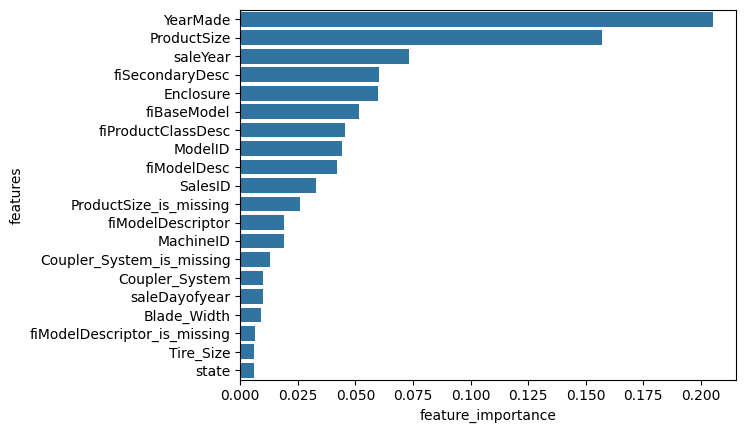

In [78]:
plot_features(X_train.columns, ideal_model.feature_importances_)

In [79]:
sum(ideal_model.feature_importances_)

0.9999999999999999

In [80]:
df.ProductSize.isna().sum()

216605

In [81]:
df.ProductSize.value_counts()

,count
ProductSize,
Medium,64342
Large / Medium,51297
Small,27057
Mini,25721
Large,21396
Compact,6280


In [82]:
df.Turbocharged.value_counts()

,count
Turbocharged,
None or Unspecified,77111
Yes,3985


In [83]:
df.Thumb.value_counts()

,count
Thumb,
None or Unspecified,85074
Manual,9678
Hydraulic,7580
